# Decision Tress with loan data

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

%matplotlib inline

In [12]:
data = pd.read_csv('lending_club_new_data.csv')

In [13]:
data.head(10)

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,0.00,171.62,0,11,5,0.4,1,8.14350
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,0.00,117.08,1.11,119.66,1,1,4,0.8,1,2.39320
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,0.00,649.91,0,11,4,1.0,1,8.25955
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,16.97,0.00,0.00,357.48,0,11,4,0.2,1,8.27585
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,0.00,161.03,0,4,6,0.8,1,5.21533
5,3000,3000,3000,18.64,109.43,48000,5.35,0,2,4,...,0.00,0.00,0.00,111.34,0,10,2,0.2,1,2.73575
6,5600,5600,5600,21.28,152.39,40000,5.55,0,2,11,...,0.00,189.06,2.09,152.39,1,5,1,0.4,1,4.57170
7,5375,5375,5350,12.69,121.45,15000,18.08,0,0,2,...,0.00,269.29,2.52,121.45,1,1,5,1.0,1,9.71600
8,6500,6500,6500,14.65,153.45,72000,16.12,0,2,14,...,0.00,0.00,0.00,1655.54,0,6,4,0.6,1,2.55750
9,12000,12000,12000,12.69,402.54,75000,10.78,0,0,12,...,0.00,0.00,0.00,6315.30,0,11,5,1.0,1,6.44064


In [14]:
data['good_loans'] = data['bad_loans'].apply(lambda y: 'yes' if y==1 else 'no')

In [15]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,recoveries,collection_recovery_fee,last_pymnt_amnt,bad_loans,emp_length_num,grade_num,sub_grade_num,delinq_2yrs_zero,payment_inc_ratio,good_loans
0,5000,5000,4975,10.65,162.87,24000,27.65,0,1,3,...,0.00,0.00,171.62,0,11,5,0.4,1,8.14350,no
1,2500,2500,2500,15.27,59.83,30000,1.00,0,5,3,...,117.08,1.11,119.66,1,1,4,0.8,1,2.39320,yes
2,2400,2400,2400,15.96,84.33,12252,8.72,0,2,2,...,0.00,0.00,649.91,0,11,4,1.0,1,8.25955,no
3,10000,10000,10000,13.49,339.31,49200,20.00,0,1,10,...,0.00,0.00,357.48,0,11,4,0.2,1,8.27585,no
4,5000,5000,5000,7.90,156.46,36000,11.20,0,3,9,...,0.00,0.00,161.03,0,4,6,0.8,1,5.21533,no


In [17]:
data['good_loans'].head(10)

0     no
1    yes
2     no
3     no
4     no
5     no
6    yes
7    yes
8     no
9     no
Name: good_loans, dtype: object

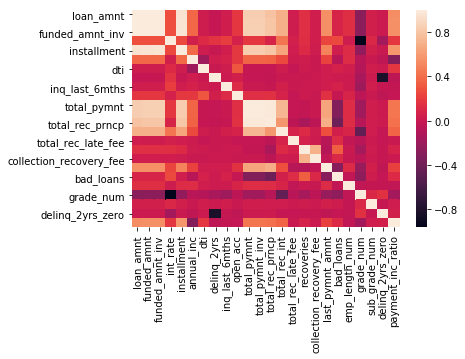

In [18]:
sns.heatmap(data.corr())

In [21]:
X = data.drop(['good_loans','bad_loans'],axis = 1)
Y = data['good_loans']

In [28]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [29]:
model = DecisionTreeClassifier()

In [30]:
model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [31]:
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [57]:
pred1 = model.predict(x_test)
conf1 = metrics.confusion_matrix(y_test,pred)
classi1 = metrics.classification_report(y_test,pred)
score1 = metrics.accuracy_score(y_test,pred)

In [58]:
print("Confusion Matrix")
print(conf1)

Confusion Matrix
[[2374    0]
 [  14  467]]


In [59]:
print(classi1)

              precision    recall  f1-score   support

          no       0.99      1.00      1.00      2374
         yes       1.00      0.97      0.99       481

    accuracy                           1.00      2855
   macro avg       1.00      0.99      0.99      2855
weighted avg       1.00      1.00      1.00      2855



In [78]:
print("Accuracy = ",score)

Accuracy =  0.9950963222416812


# Random Forest with Loan data

In [61]:
model1 = RandomForestClassifier(n_estimators=150)

In [62]:
model1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [63]:
pred = model.predict(x_test)
conf = metrics.confusion_matrix(y_test,pred)
classi = metrics.classification_report(y_test,pred)
score = metrics.accuracy_score(y_test,pred)

In [64]:
print("Confusion Matrix")
print(conf)

Confusion Matrix
[[2374    0]
 [  14  467]]


In [65]:
print(classi)

              precision    recall  f1-score   support

          no       0.99      1.00      1.00      2374
         yes       1.00      0.97      0.99       481

    accuracy                           1.00      2855
   macro avg       1.00      0.99      0.99      2855
weighted avg       1.00      1.00      1.00      2855



In [77]:
print("Accuracy = ",score)

Accuracy =  0.9950963222416812
